### Introduccion a Tensorflow

In [1]:
import tensorflow as tf

In [2]:
x1 = tf.constant([1,2,3,4,5])
x2 = tf.constant([6,7,8,9,10])

In [3]:
res = tf.multiply(x1,x2)
res

<tf.Tensor 'Mul:0' shape=(5,) dtype=int32>

In [4]:
print(res)

Tensor("Mul:0", shape=(5,), dtype=int32)


In [5]:
sess = tf.Session()
print(sess.run(res))
sess.close()

[ 6 14 24 36 50]


In [6]:
with tf.Session() as sess:
    output = sess.run(res)
    print(output)

[ 6 14 24 36 50]


In [7]:
config = tf.ConfigProto(log_device_placement = True)
config = tf.ConfigProto(allow_soft_placement = True)

# Aprendizaje neuronal de las señales de trafico

In [8]:
import os
import skimage.data as imd

In [9]:
def load_ml_data(data_directory):
    dirs = [d for d in os.listdir(data_directory)
    if os.path.isdir(os.path.join(data_directory,d))]
    
    
    
    labels = []
    images = []
    for d in dirs:
        label_dir = os.path.join(data_directory,d)
        file_names = [os.path.join(label_dir, f)
                                  for f in os.listdir(label_dir)
                                  if f.endswith('.ppm')]
        
        file_names
        for f in file_names:
            images.append(imd.imread(f))
            labels.append(int(d))
    
    return images, labels

In [10]:
main_dir = '../python-ml-course-master/python-ml-course-master/datasets/belgian/'
train_data_dir = os.path.join(main_dir,'Training')
test_data_dir = os.path.join(main_dir,'Testing')

In [11]:
images, labels = load_ml_data(train_data_dir)

In [12]:
len(images)

4575

In [13]:
import numpy as np

In [14]:
images = np.array(images)
labels = np.array(labels)

In [15]:
images.ndim

1

In [16]:
images.size

4575

In [17]:
images[0]

Array([[[210, 249, 232],
        [204, 249, 208],
        [197, 198, 155],
        ...,
        [ 51,  60,  40],
        [ 54,  64,  44],
        [ 57,  66,  46]],

       [[209, 250, 236],
        [212, 255, 217],
        [200, 196, 156],
        ...,
        [ 49,  57,  38],
        [ 51,  59,  41],
        [ 53,  60,  42]],

       [[203, 246, 236],
        [207, 246, 213],
        [202, 192, 156],
        ...,
        [ 47,  53,  35],
        [ 48,  54,  36],
        [ 48,  55,  37]],

       ...,

       [[  2,  22,  25],
        [ 26,  56,  77],
        [ 71, 140, 159],
        ...,
        [ 84,  77,  50],
        [ 68,  66,  41],
        [ 56,  64,  44]],

       [[  0,  22,  32],
        [ 30,  75, 106],
        [ 87, 176, 198],
        ...,
        [ 86,  80,  52],
        [ 68,  66,  41],
        [ 55,  63,  42]],

       [[  0,  32,  50],
        [ 42, 101, 135],
        [121, 217, 239],
        ...,
        [ 87,  80,  52],
        [ 70,  68,  43],
        [ 58,  66,  46]]

In [18]:
labels.ndim

1

In [19]:
labels.size

4575

In [20]:
len(set(labels))

62

In [21]:
images.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [22]:
images.itemsize

8

In [23]:
images.nbytes

36600

In [24]:
images.nbytes/images.itemsize

4575.0

In [25]:
import matplotlib.pyplot as plt

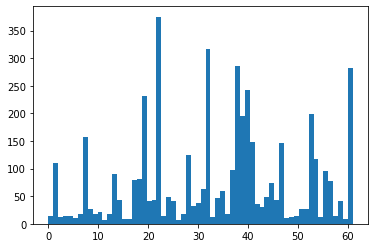

In [26]:
plt.hist(labels,len(set(labels)))
plt.show()

In [27]:
import random

In [28]:
rand_sings = random.sample(range(0,len(labels)), 6)

In [29]:
rand_sings

[2201, 505, 2781, 2048, 4323, 4037]

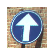

forma:(123, 119, 3), min:29, max:255


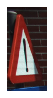

forma:(272, 128, 3), min:3, max:239


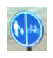

forma:(67, 60, 3), min:11, max:255


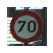

forma:(86, 87, 3), min:3, max:255


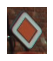

forma:(95, 80, 3), min:10, max:186


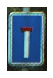

forma:(97, 60, 3), min:0, max:255


In [30]:
for i in range(len(rand_sings)):
    temp_im = images[rand_sings[i]]
    plt.subplot(1,6,i+1)
    plt.axis('off')
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print('forma:{0}, min:{1}, max:{2}'.format(temp_im.shape,
                                             temp_im.min(),
                                             temp_im.max()))

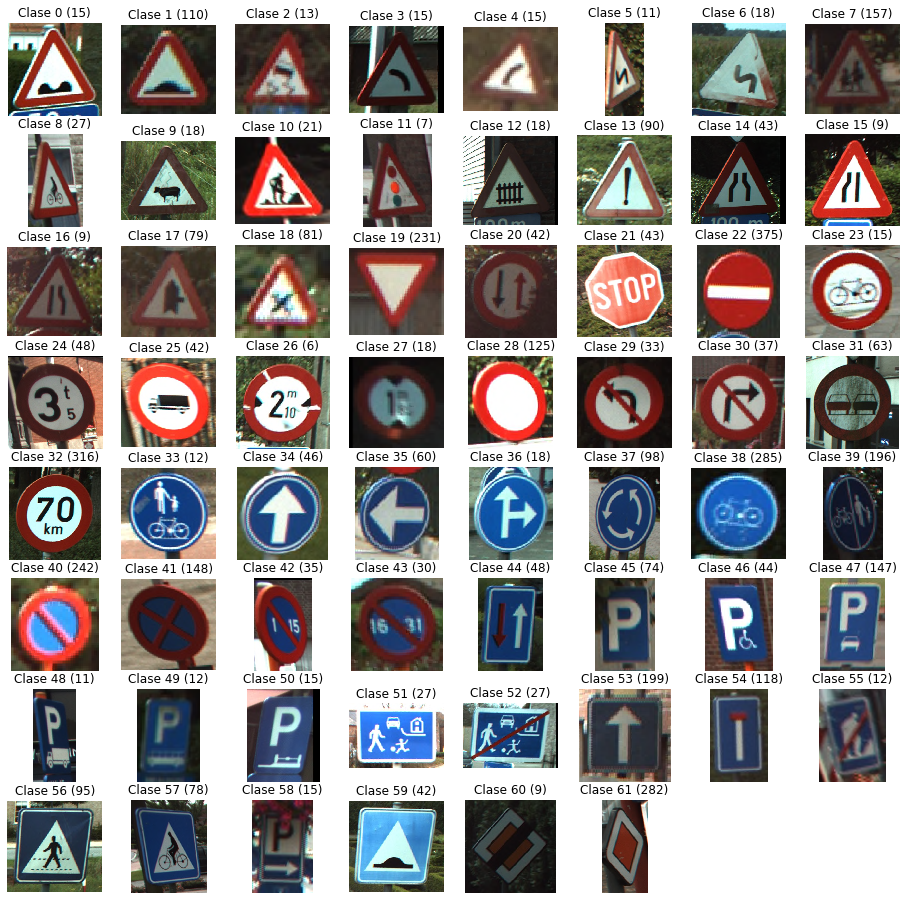

In [31]:
unique_labels = set(labels)
plt.figure(figsize=(16,16))
i = 1
for label in unique_labels:
    temp_im = images[list(labels).index(label)]
    plt.subplot(8,8, i)
    plt.axis('off')
    plt.title('Clase {0} ({1})'.format(label, list(labels).count(label))) 
    i+=1
    plt.imshow(temp_im)
                     
    

# Modelo de Red Neuronal con Tensorflow
* las imagenes no todas son del mismo tamaño
* hay 62 clases de imagenes de la 0 hasta la 61
* la distribucion de sñeales de trafico no es uniforme(algunas salen mas veces que otras)

In [32]:
from skimage import transform

In [33]:
w = 9999 
h = 9999 
for image in images:
    if image.shape[0] < h:
        h = image.shape[0]
    if image.shape[1] < w:
        w = image.shape[1]
print('Tamaño minimo: {0}x{1}'.format(h,w))

Tamaño minimo: 22x20


In [34]:
images30 = [transform.resize(image,(30,30)) for image in images]

In [35]:
images30[0].shape

(30, 30, 3)

In [36]:
rand_sings = random.sample(range(0,len(labels)), 6)
rand_sings


[1526, 4526, 674, 3363, 2018, 859]

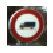

forma:(30, 30, 3), min:0.05875381263616554, max:0.9747450980392153


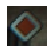

forma:(30, 30, 3), min:0.0348366013071895, max:0.5601960784313725


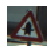

forma:(30, 30, 3), min:0.05098039215686252, max:0.9854901960784314


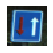

forma:(30, 30, 3), min:0.05908496732026137, max:0.9921568627450981


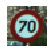

forma:(30, 30, 3), min:0.04915032679738549, max:0.901437908496732


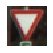

forma:(30, 30, 3), min:0.05678104575163413, max:0.902176470588236


In [37]:
for i in range(len(rand_sings)):
    temp_im = images30[rand_sings[i]]
    plt.subplot(1,6,i+1)
    plt.axis('off')
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print('forma:{0}, min:{1}, max:{2}'.format(temp_im.shape,
                                             temp_im.min(),
                                             temp_im.max()))

In [38]:
from skimage.color import rgb2gray

In [39]:
images30 = np.array(images30)
images30 = rgb2gray(images30)

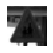

forma:(30, 30), min:0.09767014379084969, max:0.9969844509803922


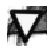

forma:(30, 30), min:0.15151931372549013, max:0.996078431372549


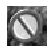

forma:(30, 30), min:0.060634455882353444, max:0.4958257761437903


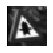

forma:(30, 30), min:0.00019607843137251003, max:0.7893384379084968


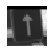

forma:(30, 30), min:0.0, max:0.7904016666666663


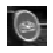

forma:(30, 30), min:0.0758378156862745, max:0.4930822156862744


In [40]:
rand_sings = random.sample(range(0,len(labels)), 6)
rand_sings
for i in range(len(rand_sings)):
    temp_im = images30[rand_sings[i]]
    plt.subplot(1,6,i+1)
    plt.axis('off')
    plt.imshow(temp_im,cmap='gray')
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print('forma:{0}, min:{1}, max:{2}'.format(temp_im.shape,
                                             temp_im.min(),
                                             temp_im.max()))

In [41]:
X = tf.placeholder(dtype = tf.float32, shape= [None, 30,30])
y = tf.placeholder(dtype = tf.int32, shape = [None])

images_flat = tf.contrib.layers.flatten(X)
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits=logits))

train_opt = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

final_pred = tf.argmax(logits,1)

accuracy = tf.reduce_mean(tf.cast(final_pred, tf.float32))


In [42]:
images_flat

<tf.Tensor 'Flatten/flatten/Reshape:0' shape=(?, 900) dtype=float32>

In [43]:
logits

<tf.Tensor 'fully_connected/Relu:0' shape=(?, 62) dtype=float32>

In [44]:
loss

<tf.Tensor 'Mean:0' shape=() dtype=float32>

In [45]:
final_pred

<tf.Tensor 'ArgMax:0' shape=(?,) dtype=int64>

In [74]:
tf.set_random_seed(1234)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(601):
    _, accuracy_val = sess.run([train_opt,accuracy],
                              feed_dict = {
                                  X:images30,
                                  y: list(labels)
                              })
    
    _, loss_val = sess.run([train_opt,loss],
                              feed_dict = {
                                  X:images30,
                                  y: list(labels)
                              })
    
    if i%50 == 0:
        print('Epoch', i)
        print('Eficacia:', accuracy_val)
        print('Perdidas',loss_val)
        print('')
   # print('fin del epoch', i)

Epoch 0
Eficacia: 51.016613
Perdidas 4.0285287

Epoch 50
Eficacia: 36.09858
Perdidas 2.23109

Epoch 100
Eficacia: 35.61661
Perdidas 1.8883468

Epoch 150
Eficacia: 35.206776
Perdidas 1.7222147

Epoch 200
Eficacia: 34.97093
Perdidas 1.6185949

Epoch 250
Eficacia: 34.887432
Perdidas 1.546109

Epoch 300
Eficacia: 34.74601
Perdidas 1.4917976

Epoch 350
Eficacia: 34.619015
Perdidas 1.449165

Epoch 400
Eficacia: 34.446777
Perdidas 1.4145325

Epoch 450
Eficacia: 34.338142
Perdidas 1.3856306

Epoch 500
Eficacia: 34.299454
Perdidas 1.3609349

Epoch 550
Eficacia: 34.21071
Perdidas 1.3395605

Epoch 600
Eficacia: 34.051365
Perdidas 1.3208182



# Evalucion de la red Neuronal

In [75]:
sample_idx = random.sample(range(len(images30)), 40)
sample_images = [images30[i] for i in sample_idx]
sample_labels = [labels[i] for i in sample_idx]


In [76]:
predictions = sess.run([final_pred], feed_dict={X:sample_images})[0]

In [77]:
predictions

array([32, 18, 44,  1, 32, 31, 45, 53, 18, 22, 39, 22, 22,  0, 40, 40, 32,
       28, 32, 38,  7, 18, 56, 22, 22, 28, 40, 35, 32, 43, 56, 45, 54, 61,
       61, 18, 32, 53, 61, 41], dtype=int64)

In [78]:
sample_labels

[46,
 18,
 44,
 0,
 25,
 31,
 46,
 53,
 18,
 13,
 39,
 22,
 22,
 19,
 36,
 40,
 32,
 28,
 32,
 38,
 7,
 18,
 56,
 22,
 22,
 28,
 19,
 35,
 20,
 43,
 56,
 10,
 54,
 61,
 61,
 9,
 32,
 53,
 25,
 41]

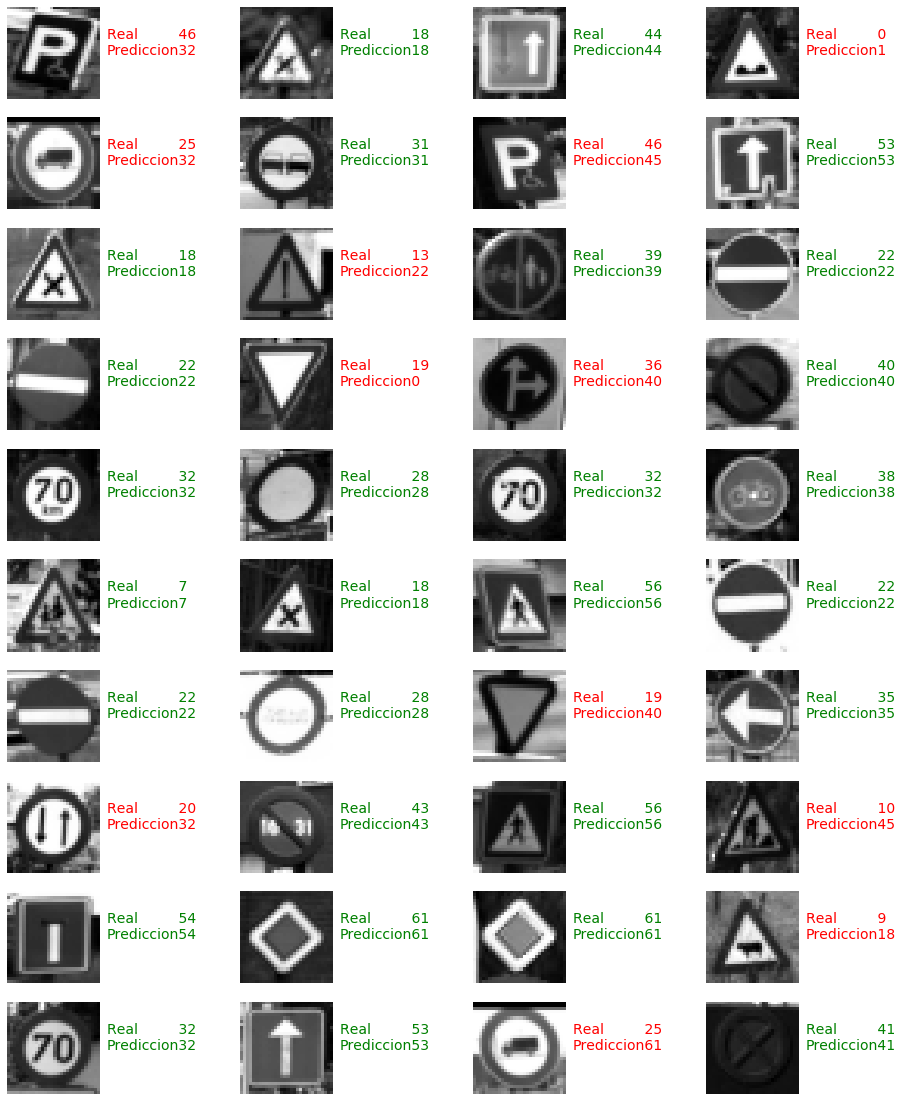

In [79]:
plt.figure(figsize=(16,20))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    predi = predictions[i]
    plt.subplot(10,4, i+1)
    plt.axis('off')
    color = 'green' if truth==predi else 'red'
    plt.text(32,15, 'Real         {0}\nPrediccion{1}'.format(truth,predi),
           fontsize = 14, color = color )
    plt.imshow(sample_images[i], cmap='gray')
plt.show()

In [80]:
test_images, test_labels = load_ml_data(test_data_dir)

In [81]:
test_images30 = [transform.resize(im, (30,30)) for im in test_images]

In [82]:
test_images30 = rgb2gray(np.array(test_images30))

In [83]:
predictions = sess.run([final_pred], feed_dict={X:test_images30})[0]

In [84]:
match_count = sum([int(l0==lp) for l0, lp in zip(test_labels, predictions)])

In [85]:
match_count

1733

In [86]:
acc = match_count/len(test_labels)*100
acc

68.76984126984127

In [87]:
print('Eficacia de la red neuronal: {:.3f}'.format(acc))

Eficacia de la red neuronal: 68.770
